<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    Machine Learning 07
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
  Classification / Logistic Regression
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>
رگرسیون لجستیک

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: : پس از تکمیل این تمرین شما قادر خواهید بود

برای طبقه‌بندی scikit استفاده از رگرسیون لجستیک در

درک ماتریس سردرگمی

<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

در این نوت‌بوک، شما رگرسیون لجستیک را یاد خواهید گرفت و سپس مدلی برای یک شرکت مخابراتی ایجاد خواهید کرد تا پیش‌بینی کند چه زمانی مشتریانش به سمت رقیب خواهند رفت، تا بتواند برای حفظ مشتریان اقداماتی انجام دهد

<h1>فهرست مطالب</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">درباره‌ی داده‌ها</a></li>
        <li><a href="#preprocessing">پیش‌پردازش و انتخاب داده‌ها</a></li>
        <li><a href="#modeling">مدل‌سازی (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="#evaluation">ارزیابی</a></li>
        <li><a href="#practice">تمرین</a></li>
    </ol>
</div>
<br>
<hr>


ما **تابع فعال‌ساز سیگموئید**، **تابع هزینه آنتروپی متقاطع دودویی**، **گرادیان تابع هزینه** و **تابعی برای محاسبه دقت اعتبارسنجی** را پیاده‌سازی می‌کنیم

<br>

سیگموئید: $
\sigma(z) = \frac{1}{1 + e^{-z}}
$

<br>

هزینه: 
$
L(w) = -\frac{1}{m} \sum_{i=1}^{m} \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]
$
&nbsp; &nbsp; s.t &nbsp; &nbsp;
$
\hat{y}^{(i)} = \sigma(X^{(i)} w)
$

<br>

گرادیان: $
\nabla_w L(w) = \frac{1}{m} X^{T} (\hat{y} - y)
$

<br>

دقت: 
$
\text{Accuracy} = \frac{1}{m} \sum_{i=1}^{m} \mathbb{I}\big[ \hat{y}^{(i)} = y^{(i)} \big]
$
&nbsp; &nbsp; s.t &nbsp; &nbsp;
$
\hat{y}^{(i)} =
\begin{cases}
1 & \text{if } \sigma(X^{(i)} w) > 0.5 \\
0 & \text{در غیر این صورت}
\end{cases}
$

___

<a id="ref1"></a>

## تفاوت رگرسیون خطی و رگرسیون لجستیک چیست؟

در حالی که رگرسیون خطی برای برآورد مقادیر پیوسته مناسب است (مثلاً تخمین قیمت خانه)، ابزار مناسبی برای پیش‌بینی کلاس یک نقطه‌ٔ دادهٔ مشاهده‌شده نیست. برای تخمین کلاس یک نقطهٔ داده، به نوعی راهنمایی نیاز داریم تا بدانیم محتمل‌ترین کلاس برای آن نقطه چیست. برای این منظور از رگرسیون لجستیک استفاده می‌کنیم


</div>
دسته‌ای باشد، کاربرد دارد. این روش یک فرمول ارائه می‌دهد y رگرسیون لجستیک نوعی از رگرسیون خطی است که وقتی متغیر وابسته مشاهده‌شده،
که احتمال برچسب کلاس را به عنوان تابعی از متغیرهای مستقل پیش‌بینی می‌کند

را برازش می‌دهد s که احتمال برچسب کلاس را به عنوان تابعی از متغیرهای مستقل پیش‌بینی می‌کند.
به‌طوری که تابع رگرسیون خطی را گرفته و برآورد عددی را با استفاده از تابع زیر به احتمال تبدیل می‌کند؛
معروف است 𝜎 این تابع به تابع سیگموید



$$
ℎ\_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +...)}}{1 + e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass\_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}
$$

در این معادله، ${\theta^TX}$ نتیجه رگرسیون (مجموع متغیرهای وزن‌دار شده توسط ضرایب) است، $exp$ تابع نمایی است و $\sigma(\theta^TX)$ تابع سیگموئید یا [تابع لجستیک](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01) است که منحنی لجستیک نیز نامیده می‌شود. این یک شکل $S$ رایج (منحنی سیگموئید) است.

بنابراین، به طور خلاصه، رگرسیون لجستیک ورودی را از طریق تابع لجستیک/سیگموئید عبور می‌دهد اما سپس نتیجه را به عنوان احتمال در نظر می‌گیرد:

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

هدف الگوریتم **رگرسیون لجستیک**، یافتن بهترین پارامترهای $θ$ برای تابع $ℎ\_\theta(𝑥)$ = $\sigma({\theta^TX})$ به گونه‌ای است که مدل به بهترین شکل ممکن، کلاس هر نمونه را پیش‌بینی کند

### مشتریان در حال ترک با رگرسیون لجستیک

یک شرکت مخابراتی نگران تعداد مشتریانی است که کسب‌وکار تلفن ثابت خود را به سمت رقبای کابلی ترک می‌کنند

آن‌ها نیاز دارند بفهمند چه کسانی در حال ترک هستند

تصور کنید شما به عنوان یک تحلیل‌گر در این شرکت فعالیت می‌کنید و باید دریابید چه کسانی در حال ترک هستند و چرا


بیایید ابتدا کتابخانه‌های مورد نیاز را وارد کنیم

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

<h2 id="about_dataset">درباره‌ی داده‌ها</h2>
این مجموعه داده اطلاعاتی ارائه می‌دهد تا به شما کمک کند پیش‌بینی کنید چه رفتارهایی به حفظ مشتریان کمک خواهد کرد. شما می‌توانید تمام داده‌های مرتبط با مشتری را تحلیل کرده و برنامه‌های متمرکز حفظ مشتری را توسعه دهید.

مجموعه داده شامل اطلاعات زیر است:

* نام دارد Churn مشتریانی که در ماه گذشته ترک کرده‌اند: ستون مربوطه 

*   خدماتی که هر مشتری ثبت‌نام کرده است: تلفن، خطوط متعدد، اینترنت، امنیت آنلاین، پشتیبان‌گیری آنلاین، حفاظت دستگاه، پشتیبانی فنی، و پخش تلویزیون و فیلم آنلاین
*   اطلاعات حساب مشتری: مدت زمان مشتری بودن، نوع قرارداد، روش پرداخت، صورتحساب بدون کاغذ، هزینه ماهانه و هزینه کل
*   اطلاعات جمعیت‌شناختی مشتریان: جنسیت، بازه سنی، و اینکه آیا شریک و فرزند دارند یا خیر


### Telco Churn بارگذاری داده‌های

یک فایل داده فرضی است که به تلاش‌های یک شرکت مخابراتی برای کاهش ترک مشتریانش مربوط می‌شود Telco Churn 
هر رکورد مربوط به یک مشتری جداگانه است و اطلاعات مختلف جمعیتی و استفاده از خدمات را ثبت می‌کند

In [3]:
import requests

url = "https://raw.githubusercontent.com/HAKAN-Fatemi/machine-learning-HAKAN/main/file_csv/ChurnData.csv"
response = requests.get(url)

with open("ChurnData.csv", "wb") as f:
    f.write(response.content)

## بارگذاری داده‌ها از فایل CSV

In [4]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2 id="preprocessing">Data pre-processing and selection</h2>


نیاز است scikit-learn بیایید چند ویژگی برای مدل‌سازی انتخاب کنیم. همچنین نوع داده هدف را به عدد صحیح تغییر می‌دهیم، زیرا این مورد توسط الگوریتم

In [5]:
churn_df = churn_df[["tenure", "age", "address", "income", "ed", "employ", "equip",   "callcard", "wireless","churn"]]
churn_df["churn"] = churn_df["churn"].astype("int")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Practice

این مجموعه داده در مجموع چند ردیف و ستون دارد؟ نام ستون‌ها چیست؟


In [6]:
# write your code here


<details><summary>برای مشاهده پاسخ اینجا کلیک کنید</summary>

```python
churn_df.shape

```

</details>


را برای مجموعه داده خود تعریف کنیم X و y بیایید

In [7]:
X = np.asarray(churn_df[["tenure", "age", "address", "income", "ed", "employ", "equip"]])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [8]:
y = np.asarray(churn_df["churn"])
y [0:5]

array([1, 1, 0, 0, 0])

همچنین، مجموعه داده را نرمال‌سازی کنیم

In [9]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train/Test dataset


مجموعه داده خود را به مجموعه آموزش و تست تقسیم کنیم


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ("Train set:", X_train.shape,  y_train.shape)
print ("Test set:", X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>


بسازیم Scikit-learn از بسته LogisticRegression بیایید مدل خود را با استفاده از

این تابع رگرسیون لجستیک را پیاده‌سازی می‌کند و می‌تواند از بهینه‌سازهای عددی مختلف برای یافتن پارامترها استفاده کند

می‌توانید با جستجو در اینترنت اطلاعات گسترده‌ای درباره مزایا و معایب این بهینه‌سازها پیدا کنید ‘newton-cg’، ‘lbfgs’، ‘liblinear’، ‘sag’ و ‘saga’ از جمله

پشتیبانی می‌کند Regularization از Scikit-learn نسخه رگرسیون لجستیک در

رگولاریزیشن تکنیکی است که برای حل مشکل بیش‌برازش مدل‌های یادگیری ماشین استفاده می‌شود

پارامتر $C$ نشان‌دهنده معکوس قدرت رگولاریزیشن است و باید یک عدد اعشاری مثبت باشد. مقادیر کوچک‌تر نشان‌دهنده رگولاریزیشن قوی‌تر هستند

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)
LR

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.01
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mu

حالا می‌توانیم با استفاده از مجموعه تست پیش‌بینی انجام دهیم


In [12]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

**predict_proba:** مقادیر برآورد شده برای همه کلاس‌ها را بازمی‌گرداند، که بر اساس برچسب کلاس‌ها مرتب شده‌اند

P(Y=0|X) ،بنابراین، ستون اول احتمال کلاس 0

P(Y=1|X) ،و ستون دوم احتمال کلاس 1

In [13]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

<h2 id="evaluation">Evaluation</h2>


### شاخص جاکارد (Jaccard Index)

بیایید از شاخص جاکارد برای ارزیابی دقت استفاده کنیم. شاخص جاکارد را می‌توان به‌صورت اندازه اشتراک تقسیم بر اندازه اجتماع دو مجموعه برچسب تعریف کرد. اگر کل مجموعه برچسب‌های پیش‌بینی شده برای یک نمونه دقیقاً با مجموعه واقعی برچسب‌ها مطابقت داشته باشد، دقت زیرمجموعه برابر با 1.0 خواهد بود؛ در غیر این صورت برابر با 0.0 است

In [14]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

### ماتریس سردرگمی (Confusion Matrix)

راه دیگر برای ارزیابی دقت طبقه‌بند، بررسی **ماتریس سردرگمی** است.


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


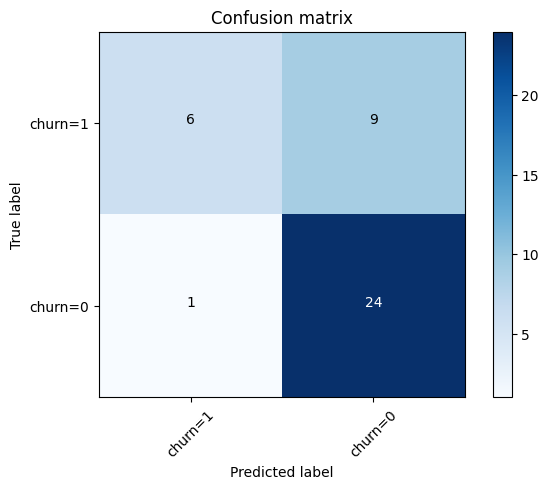

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["churn=1","churn=0"],normalize= False,  title="Confusion matrix")

آن‌ها در مجموعه تست برابر با 1 بوده است (churn) به ردیف اول نگاه کنید. ردیف اول مربوط به مشتریانی است که مقدار واقعی ترک مشتری

همان‌طور که می‌توان محاسبه کرد، از 40 مشتری، مقدار ترک 15 نفر از آن‌ها برابر با 1 است

از این 15 مورد، طبقه‌بند 6 نفر را به درستی به عنوان 1 پیش‌بینی کرده و 9 نفر را به اشتباه به عنوان 0 پیش‌بینی کرده است

این بدان معناست که برای 6 مشتری، مقدار واقعی ترک مشتری در مجموعه تست 1 بوده و طبقه‌بند نیز به درستی آن‌ها را 1 پیش‌بینی کرده است. با این حال، در حالی که برچسب واقعی 9 مشتری 1 بود، طبقه‌بند آن‌ها را 0 پیش‌بینی کرده است که عملکرد خوبی نیست. می‌توان این را به عنوان خطای مدل در ردیف اول در نظر گرفت

حالا درباره مشتریانی که مقدار ترک آن‌ها 0 بوده، چه می‌توان گفت؟ بیایید به ردیف دوم نگاه کنیم

به نظر می‌رسد که 25 مشتری بوده‌اند که مقدار ترک آن‌ها 0 بوده است

طبقه‌بند 24 نفر از آن‌ها را به درستی 0 پیش‌بینی کرده و یک نفر را اشتباهاً 1 پیش‌بینی کرده است. بنابراین، در پیش‌بینی مشتریان با مقدار ترک 0 عملکرد خوبی داشته است


،(False Positives) مثبت‌های کاذب (True Positives)، در یک حالت خاص از طبقه‌بند دودویی، مانند این مثال، می‌توان این اعداد را به عنوان تعداد مثبت‌های واقعی

تفسیر کرد (False Negatives) و منفی‌های کاذب (True Negatives) منفی‌های واقعی

In [17]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



هر برچسب را محاسبه کرد (Recall) و بازیابی (Precision) بر اساس تعداد هر بخش، می‌توان دقت

**(Precision)** معیاری از صحت پیش‌بینی‌ها است، به شرطی که یک برچسب کلاس پیش‌بینی شده باشد. به صورت زیر تعریف می‌شود :دقت

$$  
  \text{Precision} = \frac{TP}{TP + FP}
$$


**بازیابی (Recall)** نرخ مثبت‌های واقعی است و به صورت زیر تعریف می‌شود

$$
  \text{Recall} = \frac{TP}{TP + FN}
$$

بنابراین، می‌توان دقت و بازیابی هر کلاس را محاسبه کرد


**امتیاز F1 (F1 Score):**

هر برچسب را بر اساس دقت و بازیابی همان برچسب محاسبه کنیم F1 حال می‌توانیم امتیاز 


برابر 1 (دقت و بازیابی کامل) F1 میانگین هارمونیک دقت و بازیابی است، جایی که بهترین مقدار F1 امتیاز

و بدترین مقدار برابر 0 است. این معیار راه خوبی برای نشان دادن این است که یک طبقه‌بند هم برای بازیابی و هم برای دقت عملکرد خوبی دارد

برای هر دو برچسب است که در مورد ما برابر 0.72 است F1 در نهایت، می‌توان گفت که میانگین دقت این طبقه‌بند برابر با میانگین امتیاز

### log loss


را برای ارزیابی امتحان کنیم. در رگرسیون لجستیک، خروجی می‌تواند احتمال ترک مشتری باشد **log loss** حالا بیایید

(یا برابر با 1 باشد). این احتمال مقداری بین 0 و 1 دارد


**Log loss (ضرر لگاریتمی):** عملکرد یک طبقه‌بند را اندازه‌گیری می‌کند که خروجی پیش‌بینی شده آن یک مقدار احتمالی بین 0 و 1 باشد

In [18]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

<h2 id="practice">Practice</h2>

را برای ارزیابی امتحان کنیم log loss حالا بیایید

در رگرسیون لجستیک، خروجی می‌تواند احتمال ترک مشتری باشد (یا برابر با 1 باشد)این احتمال مقداری بین 0 و 1 دارد 


**ضرر لگاریتمی**، عملکرد یک طبقه‌بند را اندازه‌گیری می‌کند که خروجی پیش‌بینی شده آن یک مقدار احتمالی بین 0 و 1 باشد **Log loss**

In [19]:
# کدت رو اینجا بنویس


<details><summary>برای مشاهده پاسخ اینجا کلیک کنید</summary>

```python
LR2 = LogisticRegression(C=0.01, solver="sag").fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

```

</details>



<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

Instagram: @Fatemi_303

09220630140

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
